In [37]:
# import libraries

import tensorflow as tf
import pandas as pd
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [38]:
# load the mnist digits dataset

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape, x_test.shape)


(60000, 28, 28) (10000, 28, 28)


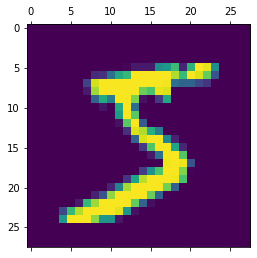

In [39]:
# visualize any random digit
plt.matshow(x_train[0])

In [40]:
# scale your data -  we'll devide by 255 the training and test data. This creates the range for the data between 0.0 - 1.0

x_train, x_test = x_train/255 , x_test/255

In [41]:
# build multiple layer perceptron neural network

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(10, activation = 'sigmoid'),
    keras.layers.Dense(200, activation = 'relu'),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(120, activation = 'relu'),
    keras.layers.Dense(150, activation = 'relu'),
    keras.layers.Dense(170, activation = 'relu'),
    keras.layers.Dense(130, activation = 'relu'),
    keras.layers.Dense(140, activation = 'relu'),
    keras.layers.Dense(250, activation = 'relu'),
    keras.layers.Dense(200, activation = 'softmax')
    
   
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_41 (Dense)            (None, 10)                7850      
                                                                 
 dense_42 (Dense)            (None, 200)               2200      
                                                                 
 dense_43 (Dense)            (None, 300)               60300     
                                                                 
 dense_44 (Dense)            (None, 120)               36120     
                                                                 
 dense_45 (Dense)            (None, 150)               18150     
                                                                 
 dense_46 (Dense)            (None, 170)              

In [42]:
# compile the model - specify the optimizer and loss to use

model.compile(
    optimizer = 'sgd',
    loss = 'sparse_categorical_crossentropy', 
    metrics = ["accuracy"])

In [43]:
# train the model
model.fit(x_train, y_train, epochs = 5,
         validation_data = (x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 2.6000 - accuracy: 0.1026 - val_loss: 2.3189 - val_accuracy: 0.1135
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.9255 - accuracy: 0.2418 - val_loss: 1.4487 - val_accuracy: 0.4046
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0359 - accuracy: 0.6130 - val_loss: 0.7071 - val_accuracy: 0.7745
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5774 - accuracy: 0.8229 - val_loss: 0.5212 - val_accuracy: 0.8447
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4209 - accuracy: 0.8762 - val_loss: 0.3742 - val_accuracy: 0.8858


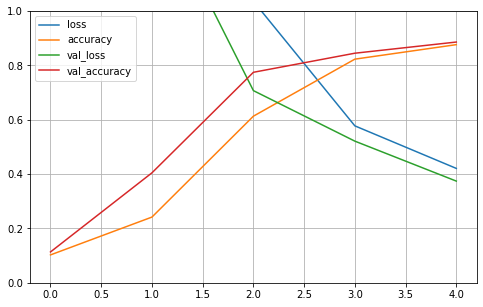

In [44]:
# Plot the learning curves

pd.DataFrame(model.history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [45]:
# evaluate the model
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3742 - accuracy: 0.8858


[0.3741708993911743, 0.8858000040054321]

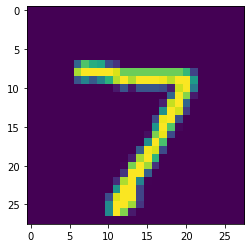

In [26]:
# make predictions
plt.imshow(x_test[0])

In [51]:
# Make predictions

x_new = x_test[0]

preds = model.predict(x_new)

preds.round(2)




1/1 [==============================] - 0s 139ms/step


array([[0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.98, 0.  , 0.01, 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 

In [53]:
# let's print out our prediction by taking the max argument from the array

np.argmax(preds)

7

We can see our model performed better in predicting the first digit in the x_test set, the digit as seen from the image looks like a 7 and our model predicted it to be so.